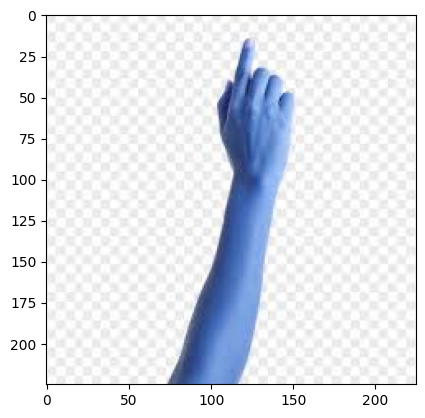

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1., 0., 0.]], dtype=float32)

In [1]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_load = load_model("model.h5")

import cv2

img = cv2.imread("/content/1.1.jpg")
resize_img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

resize_img.shape
test_image = resize_img.reshape(1, 256, 256, 3)
prediction = model_load.predict(test_image)
prediction

In [2]:
from google.colab import files
uploaded = files.upload()

Saving new_data.zip to new_data (1).zip


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [4]:
!unzip -q new_data.zip

replace new_data/test/1/users.1.1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
ggtrain_data = keras.utils.image_dataset_from_directory(
    directory = "/content/new_data/train",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32
)

test_data = keras.utils.image_dataset_from_directory(
    directory = "/content/new_data/test",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32
)

Found 2189 files belonging to 3 classes.
Found 876 files belonging to 3 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    )

In [11]:
model_load = Sequential()

model_load.add(Conv2D(128, (3, 3), activation = "relu", input_shape = (256, 256, 3)))
model_load.add(MaxPooling2D((2, 2)))

model_load.add(Conv2D(128, (3, 3), activation = "relu"))
model_load.add(MaxPooling2D((2, 2)))

model_load.add(Conv2D(128, (3, 3), activation = "relu"))
model_load.add(MaxPooling2D((2, 2)))


model_load.add(Flatten())

model_load.add(Dense(256, activation = "relu"))
model_load.add(Dense(256, activation = "relu"))
model_load.add(Dense(3, activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.optimizers import Adam
model_load.compile(optimizer=Adam(learning_rate=0.0001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [13]:
history = model_load.fit(train_data, epochs = 50, validation_data = test_data, callbacks=callback)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - accuracy: 0.6359 - loss: 14.7331 - val_accuracy: 0.7237 - val_loss: 0.7762
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step - accuracy: 0.9794 - loss: 0.0572 - val_accuracy: 0.6804 - val_loss: 0.9285
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.9897 - loss: 0.0240 - val_accuracy: 0.7763 - val_loss: 0.7013
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.7534 - val_loss: 0.8335
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.9976 - loss: 0.0049 - val_accuracy: 0.7135 - val_loss: 1.1016
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.9989 - loss: 0.0031 - val_accuracy: 0.6712 - val_loss: 1.3029
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.7626 - val_loss: 1.0035
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9916 - loss: 0.0305 - val_acc

In [14]:
model_load.save("fine_tune_model.h5")

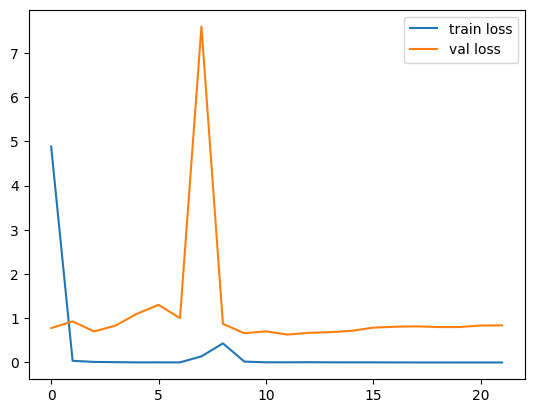

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

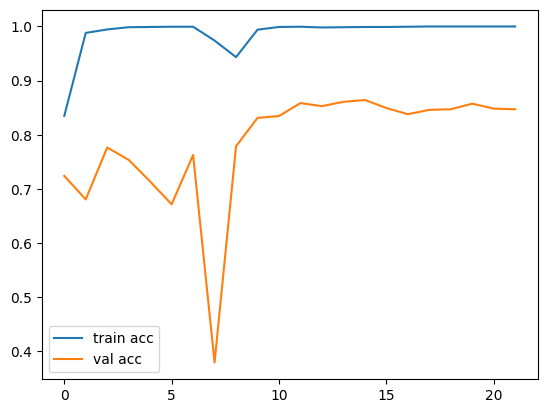

In [16]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

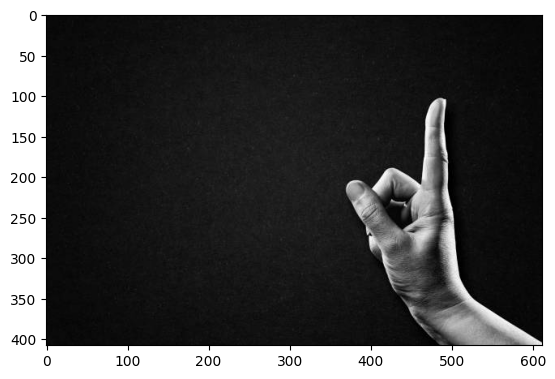

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


array([[9.9715459e-01, 2.4895114e-04, 2.5965015e-03]], dtype=float32)

In [22]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

fine_tune_model_load = load_model("fine_tune_model.h5")

import cv2

img = cv2.imread("/content/1.3.jpg")
resize_img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

resize_img.shape
test_image = resize_img.reshape(1, 256, 256, 3)
prediction = fine_tune_model_load.predict(test_image)
prediction